                  RELATIVE SPEED
Jushur                  0.998855
Kullassina-bel          0.998124
Nangishlishma           0.996233
En-tarah-ana            0.990681
Babum                   0.981504
Puannum                 0.997665
Kalibum                 0.998238
Kalumum                 0.997691
Zuqaqip                 0.998005
Atab (Aba)              0.995501
Mashda                  0.997781
Arwium                  0.996866
Etana                   0.999274
Balih                   0.989815
En-me-nuna              0.996177
Melem-Kish              0.997961
Barsal-nuna             0.998887
Zamug                   0.909251
Tizqar                  0.982337
Ilku                    0.998040
Iltasadum               0.998883
Enmebaragesi            0.997997
Aga of Kish             0.995915
Susuda                  0.957786
Dadasig                 0.573997
Mamagal                 0.987365
Kalbum                  0.955591
Tuge                    0.987442
Men-nuna                0.947235
Enbi-Ištar

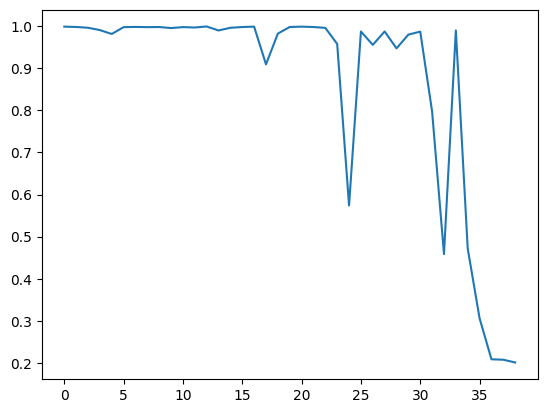

In [49]:
from matplotlib.pyplot import plot
import pandas as pd
import numpy as np
from scipy.stats import truncnorm



kish_kings = [
    ("Jushur", 1200),
    ("Kullassina-bel", 960),
    ("Nangishlishma", 670),
    ("En-tarah-ana", 420),
    ("Babum", 300),
    ("Puannum", 840),
    ("Kalibum", 960),
    ("Kalumum", 840),
    ("Zuqaqip", 900),
    ("Atab (Aba)", 600),
    ("Mashda", 840),
    ("Arwium", 720),
    ("Etana", 1500),
    ("Balih", 400),
    ("En-me-nuna", 660),
    ("Melem-Kish", 900),
    ("Barsal-nuna", 1200),
    ("Zamug", 140),
    ("Tizqar", 305),
    ("Ilku", 900),
    ("Iltasadum", 1200),
    ("Enmebaragesi", 900),
    ("Aga of Kish", 625),
    ("Susuda", 201),
    ("Dadasig", 81),
    ("Mamagal", 360),
    ("Kalbum", 195),
    ("Tuge", 360),
    ("Men-nuna", 180),
    ("Enbi-Ištar", 290),
    ("Lugalngu", 360),
    ("Kug-Bau (female)", 100),
    ("Puzur-Suen", 25),
    ("Ur-Zababa", 400),
    ("Zimudar", 30),
    ("Usi-watar", 7),
    ("Eshtar-muti", 11),
    ("Ishme-Shamash", 11),
    ("Nanniya", 7),
]

# Useful derived structures
king_names = [name for name, years in kish_kings]
reigns = np.array([years for name, years in kish_kings], dtype=float)

N_samples = 100000
lower_age = 10
upper_age = 80

#y_samples = truncnorm.rvs(a, b, loc=mu, scale=sigma, size=N_samples)
b_samples_all = []
y_samples_all = []

# Monte Carlo sampling
for x_t in reigns:
    b_samples = np.random.uniform(0, 1, N_samples)
    y_samples = x_t * np.sqrt(1 - b_samples**2)
    valid = (y_samples >= lower_age) & (y_samples <= upper_age)
    b_samples_all.append(b_samples[valid])
    y_samples_all.append(y_samples[valid])

# Compute mean and percentiles
b_mean = np.array([np.mean(b) if len(b) > 0 else np.nan for b in b_samples_all])
b_lower = np.array([np.percentile(b, 5) if len(b) > 0 else np.nan for b in b_samples_all])
b_upper = np.array([np.percentile(a, 95) if len(a) > 0 else np.nan for a in a_samples_all])

y_mean = np.array([np.mean(y) if len(y) > 0 else np.nan for y in y_samples_all])
y_lower = np.array([np.percentile(y, 5) if len(y) > 0 else np.nan for y in y_samples_all])
y_upper = np.array([np.percentile(y, 95) if len(y) > 0 else np.nan for y in y_samples_all])

t = np.arange(len(reigns))


df = pd.DataFrame(b_mean, columns=["RELATIVE SPEED"],index=king_names)
df.loc['Usi-watar', 'RELATIVE SPEED'] = 0.306  # new value
df.loc['Nanniya', 'RELATIVE SPEED'] = 0.201  # new value
print(df)
print (b_mean)

df_time = pd.DataFrame(reigns, columns=["REIGN (years)"],index=king_names)
print(df_time)

# distance in light-years (assuming c = 1 ly/year)
df_mul = df.iloc[:, 0] * df_time.iloc[:, 0]  # multiply as Series
df_mul = df_mul.to_frame('Distance')       # convert back to DataFrame

# totals
total_light_years = df_mul.sum()

print(total_light_years)

#print(b_mean)
plot(t, b_mean)